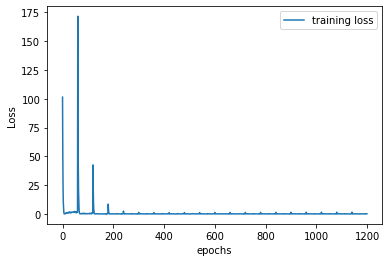

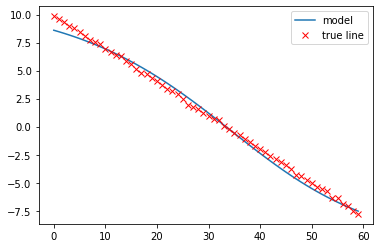

Accuracy:  78.95194739103317


In [50]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

class Data(Dataset):
  def __init__(self):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.f = -3 * self.x + 1
    self.y = self.f + 0.1 * torch.randn(self.x.size())
    self.len = self.x.shape[0]

  def __getitem__(self,item):
    return self.x[item],self.y[item]

  def __len__(self):
    return self.len


data_set= Data()

class NN(nn.Module):
  def __init__(self,in_,neuron,out_):
    super(NN,self).__init__()
    self.linear1=nn.Linear(in_,neuron)
    self.linear2=nn.Linear(neuron,out_)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x


model = NN(1,30,1)
train_loader = DataLoader(dataset=data_set,batch_size=1)
optimiser = optim.SGD(model.parameters(),lr=0.01)
criterion = nn.MSELoss()
LOSS=[]

def train(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat,y)
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()
      LOSS.append(loss.item())


train(20)

plt.plot(LOSS, label = 'training loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.show()

plt.plot(model(data_set.x).data.numpy(), label='model')
plt.plot(data_set.y, 'rx',label='true line')
plt.legend()
plt.show()


print("Accuracy: ",(1-criterion(model(data_set.x),data_set.y).item())*100)
